<a href="https://colab.research.google.com/github/KOISSYK/AI_class_machine-learning/blob/main/3_2%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

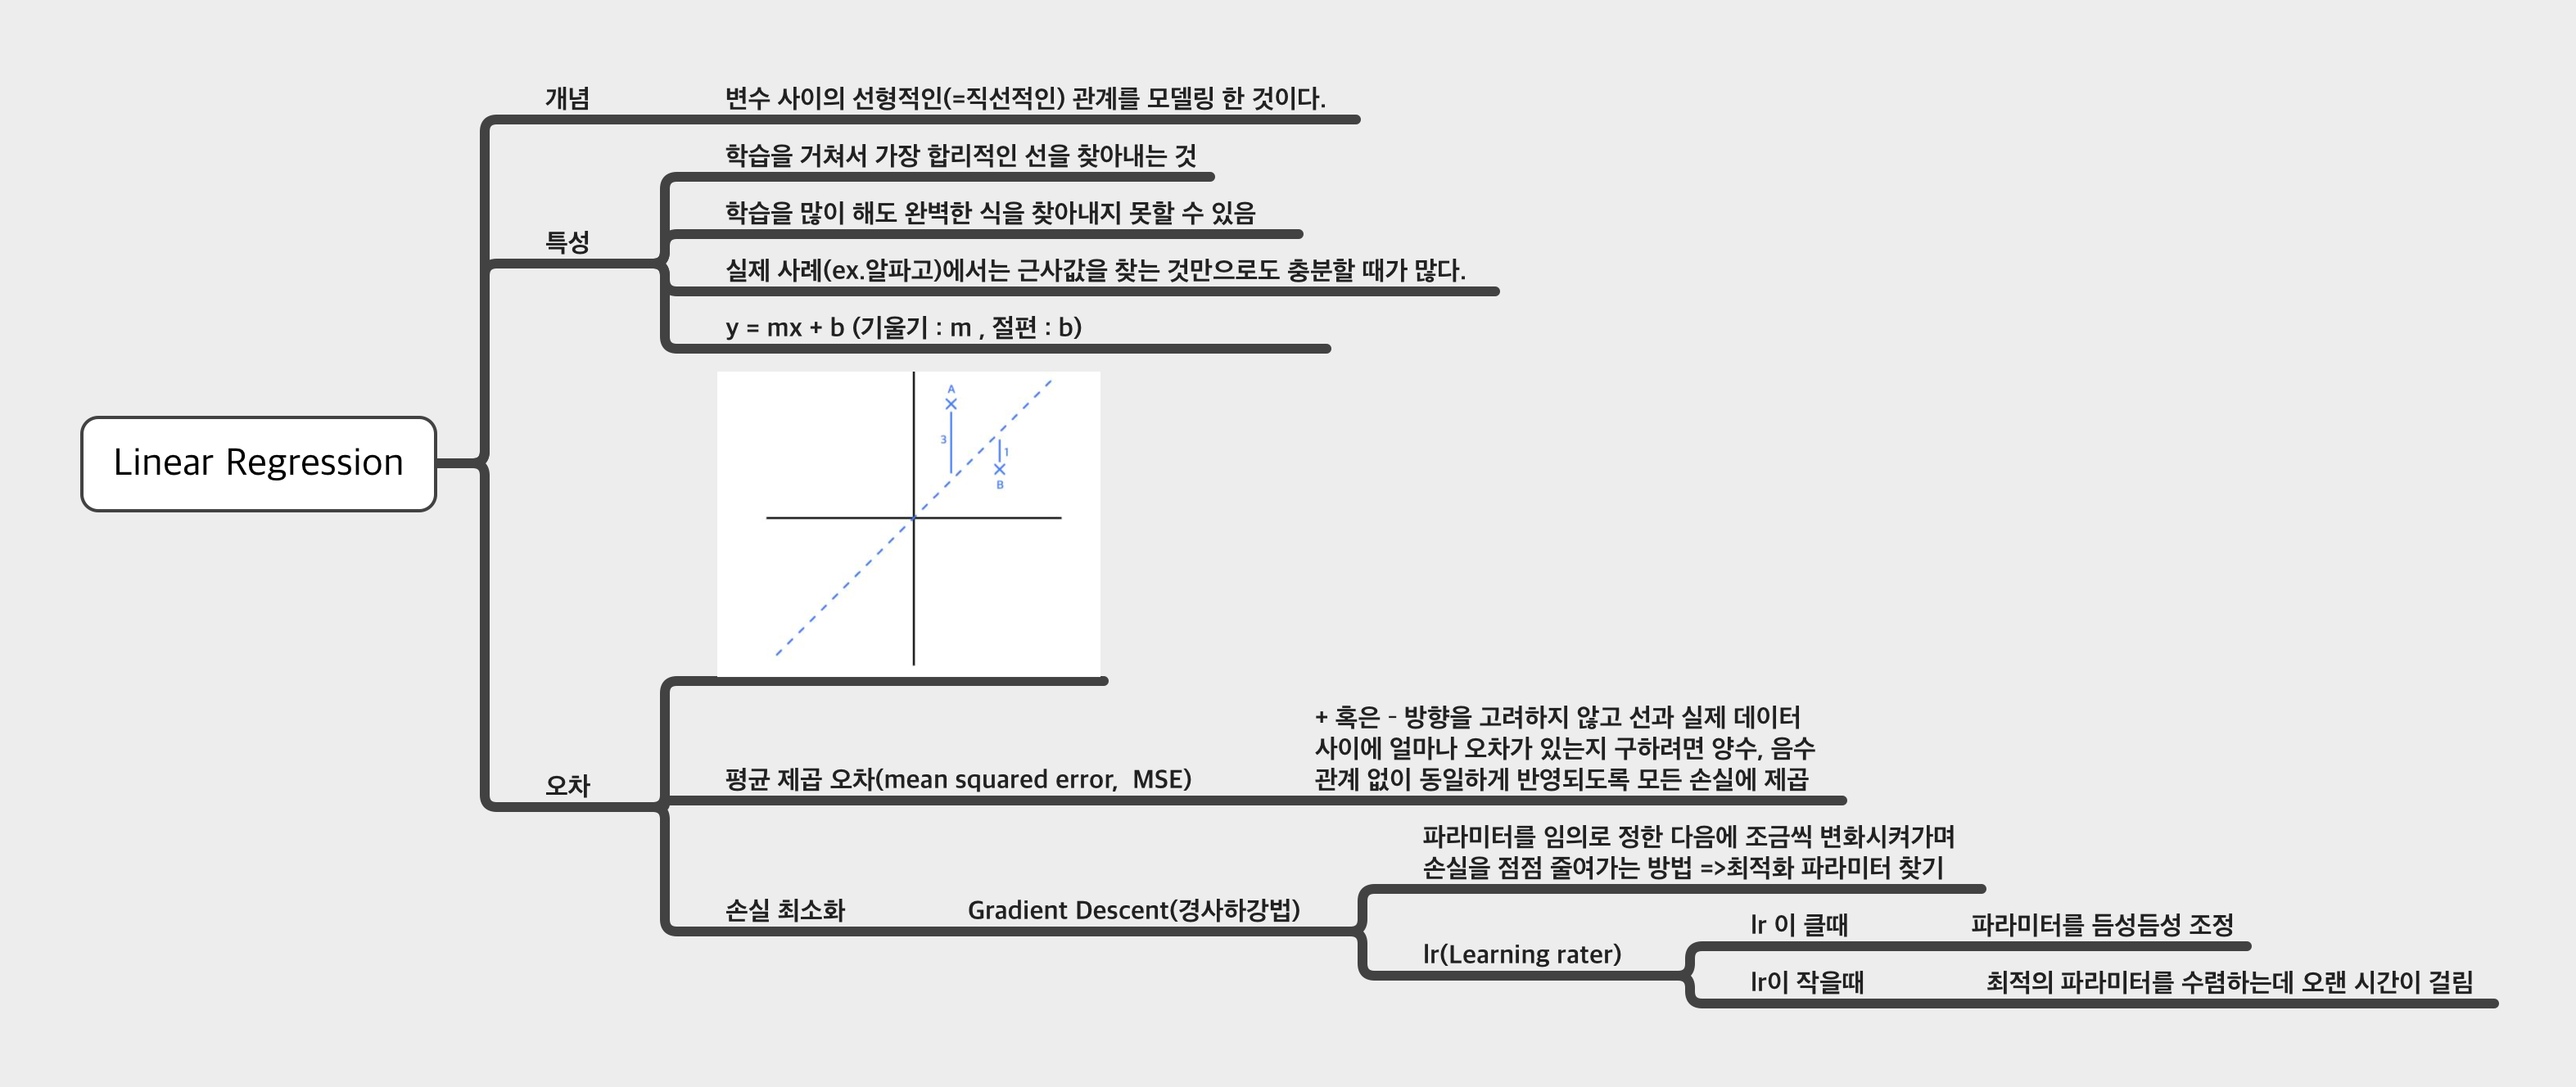

In [2]:
import numpy as np

In [3]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

>K-최근접 이웃의 한계

In [4]:
from sklearn.model_selection import train_test_split
#훈련세트와 테스트세트 나누기
train_input,test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)
#훈련세트와 테스트 세트 2차원 배열
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

print(knr.predict([[50]]))



[1033.33333333]


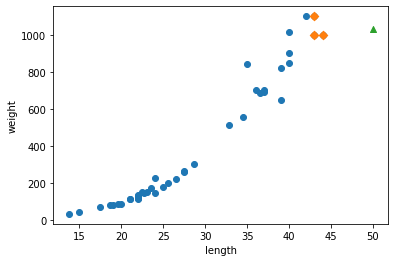

In [6]:
import matplotlib.pyplot as plt
#훈련세트중 이웃샘플만 다시 만들기
# 50cm 농어의 이웃을 구하기
distances , indexes = knr.kneighbors([[50]])
plt.scatter (train_input, train_target)
# 훈련 세트 중에서 이웃 샘플만 다시 그리기
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')
plt.scatter(50,1033, marker = '^') #50cm농어의 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [9]:
print(knr.predict([[100]]))

[1033.33333333]


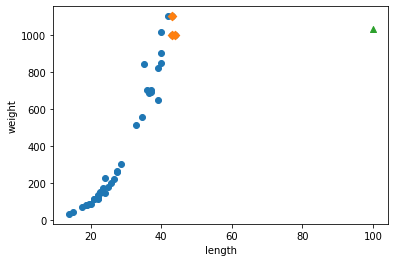

In [14]:
#100cm 농어의 이웃을 구하기
distances, index = knr.kneighbors([[100]])
plt.scatter(train_input,train_target)
#훈련세트 중에서 이웃샘플만 다시그리기
plt.scatter(train_input[indexes],train_target[indexes], marker = 'D')
plt.scatter(100,1033,marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

==>  테스트하고자 하는 샘플에 근접한 훈련 데이터가 없는 경우, 즉 훈련 셋의 범위를 많이 벗어나는 샘플인 경우 정확하게 예측하기 어려운 한계가 있다. 

>선형회귀

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
#50cm농어에 대한 예측
lr.predict([[50]])

array([1241.83860323])

In [17]:
print(lr.coef_,lr.intercept_)    # 추정된 가중치 벡터(coef_)#추정된 상수항(intercept_)

[39.01714496] -709.0186449535477




*   lr.coef_는 기울기 매개변수인 w를 말하며 무게(weight) 또는 계수(coefficient)
*   lr.intercept_는 y축 절편인 오프셋(offset)을 말하며 절편(intercept)



In [18]:
import matplotlib.pyplot as plt

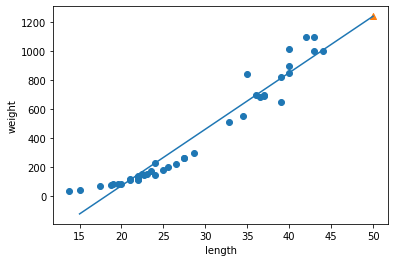

In [19]:
#훈련세트의 산점도 그리기
plt.scatter(train_input, train_target)
#15에서 50까지의 1차방정식 그래프 그리기
plt.plot([15, 50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
#50cm 농어의 산점도 그리기
plt.scatter(50,1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [20]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


>다항회귀

In [22]:
train_poly = np.column_stack((train_input **2,train_input))
test_poly = np.column_stack((test_input **2,test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [28]:
lr = LinearRegression()
lr.fit(train_poly, train_target)   #lr.fit(X,Y)  
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [29]:
print(lr.coef_,lr.intercept_)             ### 이차방정식 결과값 : y= 1.014332 x^2 + (-21.55792)x + 116.0502107

[  1.01433211 -21.55792498] 116.0502107827827


In [30]:
# 구간별 직선을 그리기 위해 15에서 50까지 정수 배열을 만듭니다
point = np.arange(15,50)

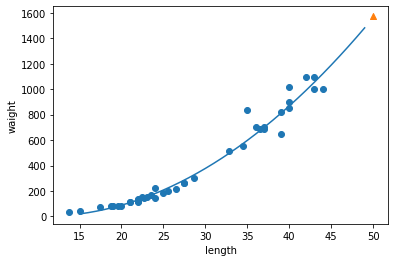

In [33]:
#훈련세트의 산점도 그리기
plt.scatter(train_input, train_target)
#15에서 50까지의 2차방정식 그래프 그리기
plt.plot(point, 1.01*point**2 -21.6*point +116.05)
plt.scatter([50],1574,marker = '^')
plt.xlabel('length')
plt.ylabel('waight')
plt.show()

In [34]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122
